In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
df = pd.read_pickle('treino.pkl.gz')

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (20, 8)

In [3]:
# a fim de me organizar melhor, dividi as variáveis explicativas nestes sub grupos:

sub1 = ['id_pessoa', 'valor_emprestimo', 'custo_ativo', 'emprestimo_custo','agencia', 'revendedora',
        'montadora', 'Current_pincode_ID', 'nascimento', 'emprego', 'data_contrato', 'estado', 'funcionario', 
        'score', 'score_desc']

sub2 = ['par_pri_emp', 'par_seg_emp', 'nov_emp_6m', 'def_emp_6m', 'tem_med_emp', 'tem_pri_emp', 'qtd_sol_emp']
 
sub3 = ['flag_telefone', 'flag_aadhar', 'flag_pan', 'flag_eleitor', 'flag_cmotorista', 'flag_passaporte']     

sub4 = ['pri_qtd_tot_emp', 'pri_qtd_tot_emp_atv', 'pri_qtd_tot_def', 'pri_emp_abt', 'pri_emp_san','pri_emp_tom']
sub5 = ['sec_qtd_tot_emp', 'sec_qtd_tot_emp_atv', 'sec_qtd_tot_def', 'sec_emp_abt', 'sec_emp_san','sec_emp_tom']

# sub1 - dados sobre o cliente e a compra
# sub2 - dados sobre o empréstimo
# sub3 - flags sobre compartilhamento de documentos
# sub4 - dados sobre conta primária
# sub5 - dados sobre conta secundária

# neste notebook, dou minha opinião sobre sub1, sub2 e sub3

# sobre balanceamento da base

In [4]:
df['default'].value_counts(1)

0    0.783608
1    0.216392
Name: default, dtype: float64

# IDADE

In [5]:
df['nascimento'].isnull().value_counts()

False    186523
Name: nascimento, dtype: int64

In [6]:
# possíveis anos de nascimento
# suponho que todos sejam '19--', com exceção de '1900', neste caso, considero que o ano seja '2000'
df['nascimento'].str[6:].unique()

array(['76', '97', '83', '94', '92', '80', '79', '95', '96', '72', '73',
       '71', '88', '84', '61', '70', '75', '85', '69', '77', '67', '82',
       '74', '89', '63', '64', '87', '65', '91', '81', '90', '78', '86',
       '93', '99', '68', '62', '98', '55', '58', '59', '66', '00', '60',
       '56', '54', '57', '49'], dtype=object)

In [7]:
def year_to_age(x):
    if x == '00':
        return 20
    else:
        return (100 - int(x)) + 20

df['nascimento'] = df['nascimento'].str[6:].apply(lambda x: year_to_age(x))
df = df.rename(columns = {'nascimento': 'idade'})

# EMPREGO

In [8]:
df['emprego'].isnull().value_counts()

# será necessário imputar ou eliminar valores

False    180376
True       6147
Name: emprego, dtype: int64

In [9]:
df['emprego'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [10]:
# optando por imputar

imp = SimpleImputer(strategy = 'constant', fill_value = 'Unknown')
df['emprego'] = imp.fit_transform(df[['emprego']])
df['emprego'] = df['emprego'].str.replace(' ', '_') # tratamento que será importante no futuro

# DATA CONTRATO

In [11]:
df['data_contrato'].isnull().value_counts()

False    186523
Name: data_contrato, dtype: int64

In [12]:
# formato dos dados da coluna 'data_contrato'

df['data_contrato'].unique()

array(['03-09-18', '26-10-18', '29-10-18', '19-09-18', '14-10-18',
       '13-10-18', '27-09-18', '23-08-18', '22-10-18', '21-09-18',
       '25-09-18', '31-08-18', '21-08-18', '15-10-18', '30-09-18',
       '16-09-18', '08-10-18', '10-09-18', '20-08-18', '23-09-18',
       '29-08-18', '11-09-18', '16-08-18', '15-09-18', '14-09-18',
       '07-09-18', '25-08-18', '18-10-18', '09-08-18', '04-09-18',
       '06-08-18', '22-09-18', '25-10-18', '14-08-18', '11-10-18',
       '22-08-18', '20-10-18', '10-08-18', '28-08-18', '10-10-18',
       '06-10-18', '26-09-18', '17-08-18', '24-10-18', '24-08-18',
       '27-08-18', '16-10-18', '21-10-18', '20-09-18', '08-08-18',
       '30-08-18', '29-09-18', '17-09-18', '28-10-18', '30-10-18',
       '31-10-18', '03-10-18', '23-10-18', '04-10-18', '05-09-18',
       '12-10-18', '09-10-18', '27-10-18', '28-09-18', '12-08-18',
       '08-09-18', '01-08-18', '18-09-18', '19-10-18', '02-10-18',
       '24-09-18', '13-08-18', '18-08-18', '12-09-18', '03-08-

In [13]:
df['data_contrato'].str[6:].unique()

# todos os contratos são de 2018

array(['18'], dtype=object)

In [14]:
df['data_contrato'].str[3:5].unique()

# dentro do ano 2018, os possíveis meses são agosto, setembro e outubro
# dividirei os dados entre estes

array(['09', '10', '08'], dtype=object)

In [15]:
def month_split(x):
    if x == '08':
        return 'agosto'
    elif x == '09':
        return 'setembro'
    else: 
        return 'outubro'
    
df['data_contrato'] = df['data_contrato'].str[3:5].apply(lambda x: month_split(x))
df = df.rename(columns = {'data_contrato': 'mes_contrato'})

# SCORE

In [16]:
print(df['score_desc'].isnull().value_counts())
print(df['score'].isnull().value_counts())

False    186523
Name: score_desc, dtype: int64
False    186523
Name: score, dtype: int64


In [17]:
df['score_desc'].unique()

# em um primeiro momento, de forma grosseira, considero a possibilidade de dividir os possíveis valores de 
# 'score_desc' entre possuindo a palavra 'Risk' ou não

array(['F-Low Risk', 'A-Very Low Risk', 'C-Very Low Risk',
       'H-Medium Risk', 'No Bureau History Available', 'M-Very High Risk',
       'K-High Risk', 'B-Very Low Risk', 'I-Medium Risk',
       'D-Very Low Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: No Updates available in last 36 months',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'E-Low Risk', 'J-High Risk', 'G-Low Risk',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: Not Enough Info available on the customer',
       'L-Very High Risk',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [18]:
# 1. buscando por valores de 'score_desc' que não continham a palavra 'Risk' ou 'risk'

other_types = df.loc[(df['score_desc'].str.contains('Risk') == False) &
                     (df['score_desc'].str.contains('risk') == False), 
                     'score_desc'].unique()

print('scores para dados "Not Scored":', df.loc[df['score_desc'].str.contains('No') == True, 'score'].unique())

other_types

scores para dados "Not Scored": [ 0 14 18 16 15 17 11]


array(['No Bureau History Available', 'Not Scored: Only a Guarantor',
       'Not Scored: No Updates available in last 36 months',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: Not Enough Info available on the customer',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

# justificando eliminar a coluna 'score'(utilizar 'score_desc')

In [19]:
# 2. buscando por valores de 'score_desc' que continham palavra 'Risk'

# percebe-se que parte de cada valor é escrita por extenso e outra parte consiste em uma letra

df.loc[(df['score_desc'].str.contains('Risk')) |
       (df['score_desc'].str.contains('Risk')), 
       'score_desc'].unique()

array(['F-Low Risk', 'A-Very Low Risk', 'C-Very Low Risk',
       'H-Medium Risk', 'M-Very High Risk', 'K-High Risk',
       'B-Very Low Risk', 'I-Medium Risk', 'D-Very Low Risk',
       'E-Low Risk', 'J-High Risk', 'G-Low Risk', 'L-Very High Risk'],
      dtype=object)

In [20]:
# aprofundando análise dos valores de 'score_desc' que possuem 'Risk' ou 'risk'

print(df.loc[df['score_desc'].str.contains('Very Low'), 'score_desc'].unique())
print(df.loc[(df['score_desc'].str.contains('Low')) &
     (df['score_desc'].str.contains('Very') == False), 'score_desc'].unique())
print(df.loc[df['score_desc'].str.contains('Medium'), 'score_desc'].unique())
print(df.loc[(df['score_desc'].str.contains('High')) &
             (df['score_desc'].str.contains('Very') == False), 'score_desc'].unique())
print(df.loc[df['score_desc'].str.contains('Very High'), 'score_desc'].unique())

# o que querem dizer as letras?
# r:são subgrupos de cada tipo de risco, o risco aumenta conforme se percorre o alfabeto

# Very Low Risk (A, B, C, D)
# Low Risk (E, F, G)
# Medium Risk (H, I)
# High Risk (J, K)
# Very High Risk (L, M)

['A-Very Low Risk' 'C-Very Low Risk' 'B-Very Low Risk' 'D-Very Low Risk']
['F-Low Risk' 'E-Low Risk' 'G-Low Risk']
['H-Medium Risk' 'I-Medium Risk']
['K-High Risk' 'J-High Risk']
['M-Very High Risk' 'L-Very High Risk']


In [21]:
# como se comporta o 'score', para cada 'score_desc'
# dividir dados pela letra presente no 'score_desc'

df_risk_letter = df.copy()
df_risk_letter = df_risk_letter.loc[(df_risk_letter['score_desc'].str.contains('Risk')) |
                                    (df_risk_letter['score_desc'].str.contains('risk'))]
df_risk_letter['risk_letter'] = df_risk_letter['score_desc'].str[0]
df_risk_letter[['risk_letter', 'score']].groupby('risk_letter').mean()

,score
risk_letter,
A,827.646657
B,774.158211
C,741.895311
D,715.966128
E,691.516206
F,666.132175
G,640.968760
H,617.100385
I,586.856651


In [22]:
# dividir dados pelo valor presente no 'score_desc', desconsiderando a letra

df_risk_word = df.copy()
df_risk_word = df_risk_word.loc[(df_risk_word['score_desc'].str.contains('Risk')) |
                 (df_risk_word['score_desc'].str.contains('risk'))]
df_risk_word['risk_word'] = df_risk_word['score_desc'].str[2:]
df_risk_word[['risk_word', 'score']].groupby('risk_word').mean().sort_values('score')

,score
risk_word,
Very High Risk,303.005018
High Risk,474.778707
Medium Risk,603.669353
Low Risk,668.648474
Very Low Risk,765.769443


In [23]:
# PENDÊNCIAS('score' e 'score_desc')

# podemos eliminar a coluna 'score' posto que esta é correlacionada à 'score_desc', 
# na coluna 'score_desc' pode ser dividir os dados tanto pelo tipo de risco, quanto pela letra que 
# acompanha a descrição(esta seria mais precisa), qual delas usar ?

# como tratar dados 'Not Scored' ?

### até aqui:
###   
### noção sobre balanceamento
### transformação da variável explicativa 'nascimento' em 'idade'
### tratamento da series 'emprego'
### transformação da coluna 'data_contrato' em 'mes_contrato'
### proposta de tratamento / transformação das series 'score' e 'score_desc'

# VARIÁVEIS : 'nov_emp_6m' e 'def_emp_6m'

In [24]:
# o que quer dizer, exatamente, 'quantidade de crédito' ?

print('empréstimos tomados nos últimos 6 meses:', df['def_emp_6m'].unique())
print('quantidade de crédito descumprido nos últimos 6 meses:', df['nov_emp_6m'].unique())

empréstimos tomados nos últimos 6 meses: [ 0  1  2  3  4  5  7  6 12  8 20 11  9 10]
quantidade de crédito descumprido nos últimos 6 meses: [ 3  0  4  2  1  8  5  6  7 10 14  9 11 16 12 20 19 13 18 23 35 17 21 28
 15]


In [25]:
# é válido subtrair um pelo outro ? isso diria alguma coisa ?
df[['def_emp_6m', 'nov_emp_6m']].iloc[0]

def_emp_6m    0
nov_emp_6m    3
Name: 155653, dtype: int64

# VARIÁVEIS: 'valor_emprestimo' , 'custo_ativo' , 'emprestimo_custo' 
###  
### 'valor_emprestimo' -> valor total emprestado pela financeira
### 'custo_ativo' -> custo do ativo(veículo)
### 'emprestimo_custo' -> razão entre valor emprestado e valor do ativo(veículo)

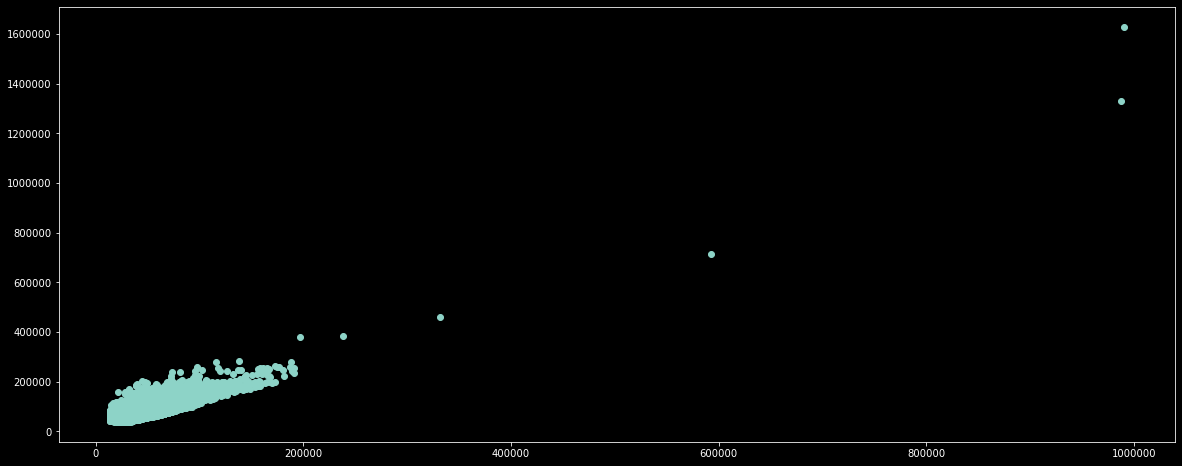

In [26]:
# df[['valor_emprestimo', 'custo_ativo', 'emprestimo_custo']]

# variáveis relacionadas, como usar ?

# suponho que haja correlação entre 'valor_emprestimo' e 'custo_ativo'
plt.scatter(df['valor_emprestimo'], df['custo_ativo'])
plt.show()
# plot 'distorcido' por outliers

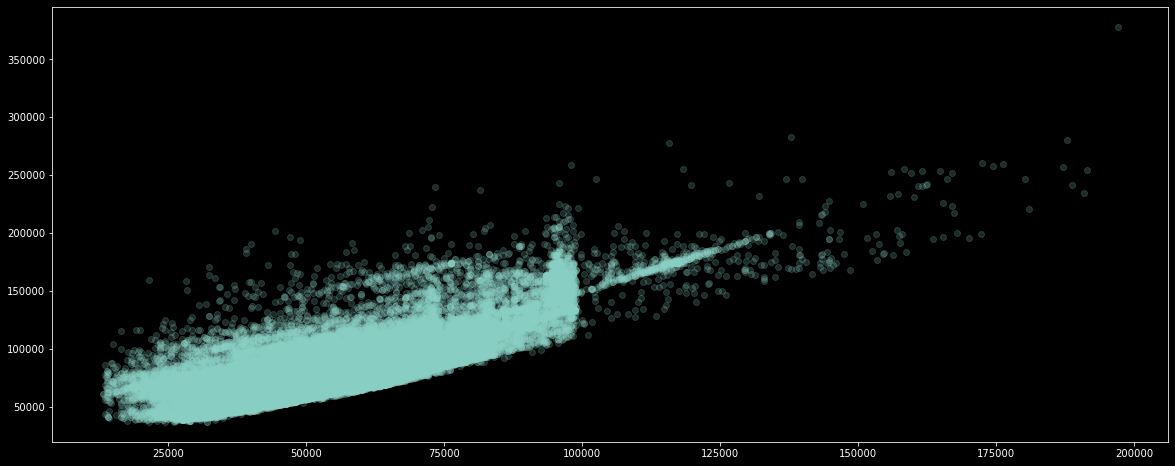

(0.7389642200010262, 0.0)

In [27]:
df_emp_val_otlr_rem = df.loc[df['valor_emprestimo'] < 200000]
plt.scatter(df_emp_val_otlr_rem['valor_emprestimo'], df_emp_val_otlr_rem['custo_ativo'], alpha = 0.2)
plt.show()

pearsonr(df_emp_val_otlr_rem['valor_emprestimo'], df_emp_val_otlr_rem['custo_ativo'])

In [28]:
# a correlação observada entre 'valor_emprestimo' e 'custo_ativo' é significativa ? é válido combinar as duas ?
# por exemplo:
df['dif_custo_emp'] = df['custo_ativo'] - df['valor_emprestimo']

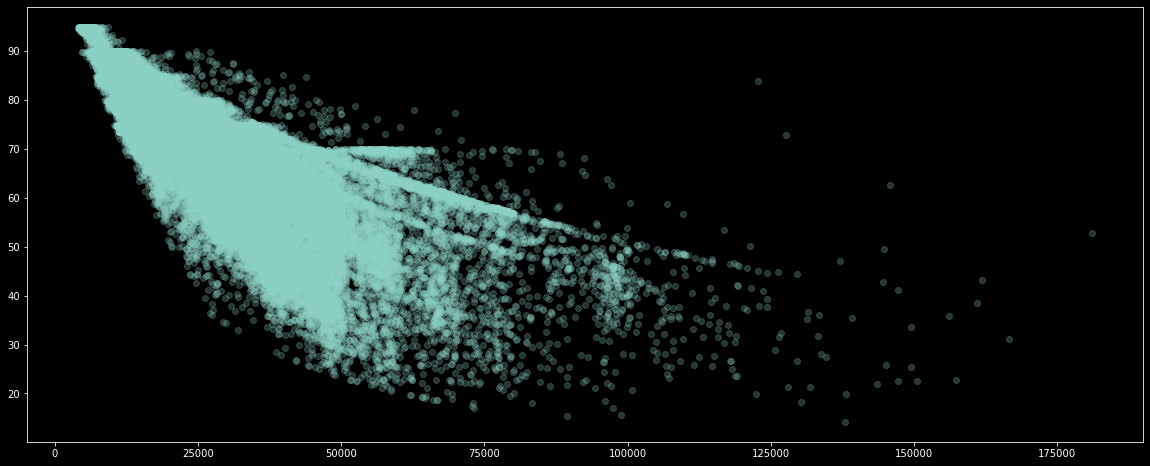

(-0.8496692657785447, 0.0)

In [29]:
df_dif_custo_emp_otlr_rem = df.loc[df['dif_custo_emp'] < 200000]
plt.scatter(df_dif_custo_emp_otlr_rem['dif_custo_emp'], df_dif_custo_emp_otlr_rem['emprestimo_custo'],
            alpha = 0.25)
plt.show()
pearsonr(df_dif_custo_emp_otlr_rem['dif_custo_emp'], df_dif_custo_emp_otlr_rem['emprestimo_custo'])

In [30]:
# obs: alterei dataframe original, criei slices onde removi outliers
# dúvida: tirar pearson antes com ou sem outliers ?

# recapitulando análise de 'valor_emprestimo'(1) , 'custo_ativo'(2) , 'emprestimo_custo'(3):

# primeiramente, observo correlação entre 'valor_emprestimo'(1) e 'custo_ativo'(2), combino-as na variável 
# 'dif_custo_emp'(4)

# em seguida, observo correlação entre 'dif_custo_emp'(4) e 'emprestimo_custo'(3)

# neste ponto, cogito combinar 'dif_custo_emp' e 'emprestimo_custo', ou eliminar uma delas, posto que 
# possuem correlação alta, 

# entretanto, ainda não o faço, e prossigo com análise de 'dif_custo_emp', que é a combinação de 'custo_ativo'
# e 'valor_emprestimo'

# ANÁLISE 'dif_custo_emp'
###  
### pretendo analisar a distribuição desta variável e criar quartis ou segementos derivados de percentis, estes que permitirão a alocação de dados sob categorias criadas à partir do valor de 'dif_custo_emp'
### ex: low_dif, med_dif, high_dif, otlr_dif

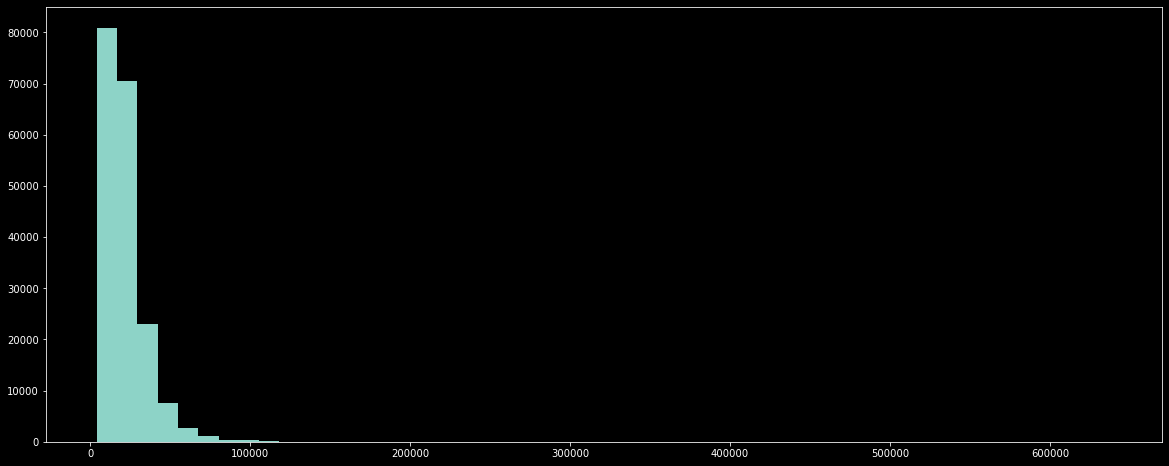

In [31]:
plt.hist(df['dif_custo_emp'], bins = 50)
plt.show()

# percebe-se a necessidade de remover outliers

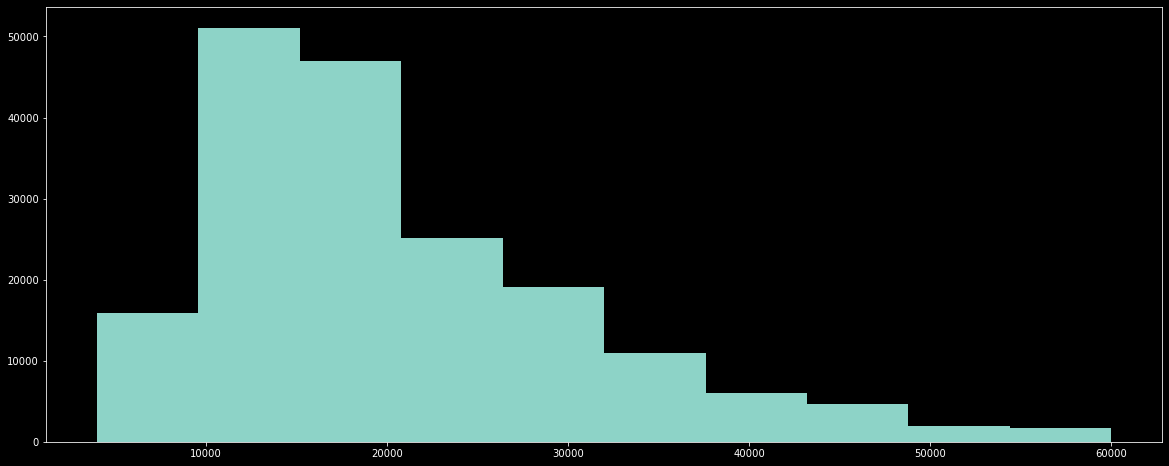

perda percentual de dados, com remoção de outliers: 1.59 %


In [32]:
df_dif_custo_otlr_rem = df.loc[df['dif_custo_emp'] < 60000]
plt.hist(df_dif_custo_otlr_rem['dif_custo_emp'])
plt.show()

print('perda percentual de dados, com remoção de outliers:',
   round((1 - (len(df_dif_custo_otlr_rem) / len(df))) * 100, 2), '%')

# usar estes dados como base para criar categorias por percentil, alocar os dados que estão fora desta 
# distribuição sob a categoria 'otlr_dif' ?

In [33]:
# prosseguindo para a segmentação dos dados, de acordo com percentis (33, 66)
# estabeleci anteriormente, que outliers são dados cujo valor de 'dif_custo_emp' ultrapassam 60000,
# estes serão alocados sob o label 'very_high'

# obtendo thresholds para percentis (utilizando 'df_dif_custo_otlr_rem')
first_dif_emp_threshold = np.quantile(a = df_dif_custo_otlr_rem['dif_custo_emp'], q = 0.33)
second_dif_emp_threshold = np.quantile(a = df_dif_custo_otlr_rem['dif_custo_emp'], q = 0.66)

def categorize_three_splits(x, frst_thrshld, scnd_thrshld, otlr_thrshld):
    if x < frst_thrshld:
        return 'low'
    elif x >= frst_thrshld and x < scnd_thrshld:
        return 'medium'
    elif x >= scnd_thrshld and x < otlr_thrshld:
        return 'high'
    else:
        return 'very_high'
    
df['dif_custo_emp'] = df['dif_custo_emp'].apply(lambda x: categorize_three_splits(x, first_dif_emp_threshold, 
                                                            second_dif_emp_threshold, 60000))

# PLOTS

In [34]:
# função para plot de frequência de 'default', de acordo com valore de determinada series
def plot_default_freq(dataframe, series_name, integer = False):
    
    vals = []
    df_aux = dataframe.copy()
    
    if integer == True:    
        df_aux[series_name] = df_aux[series_name].astype(int)
        for val in df_aux[series_name].unique():
            vals.append(val)
        vals.sort()
        df_aux[series_name] = df_aux[series_name].astype(str)
        
    if integer == False:
        for val in df_aux[series_name].unique():
            vals.append(val)
            
    data_list = []
    for value in vals:
        exec("df_{0} = df_aux.loc[df_aux[series_name] == '{0}']".format(value))
        exec("data_list.append(df_{0})".format(value))
    
    pos = 0
    for data in data_list:
        plt.bar([pos], [len(data)], color = 'green')
        plt.bar([pos], [len(data[data['default'] == 1])], color = 'red')
        pos += 1
        
    plt.xticks(range(len(vals)), vals)
    plt.xticks(rotation = 45)
    plt.yticks([])
    plt.show()

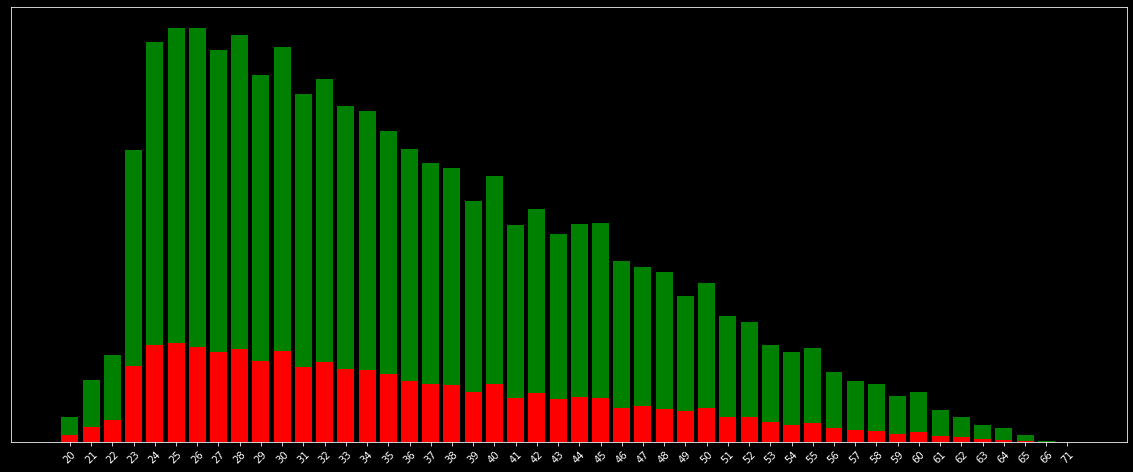

In [35]:
plot_default_freq(df, 'idade', integer = True)

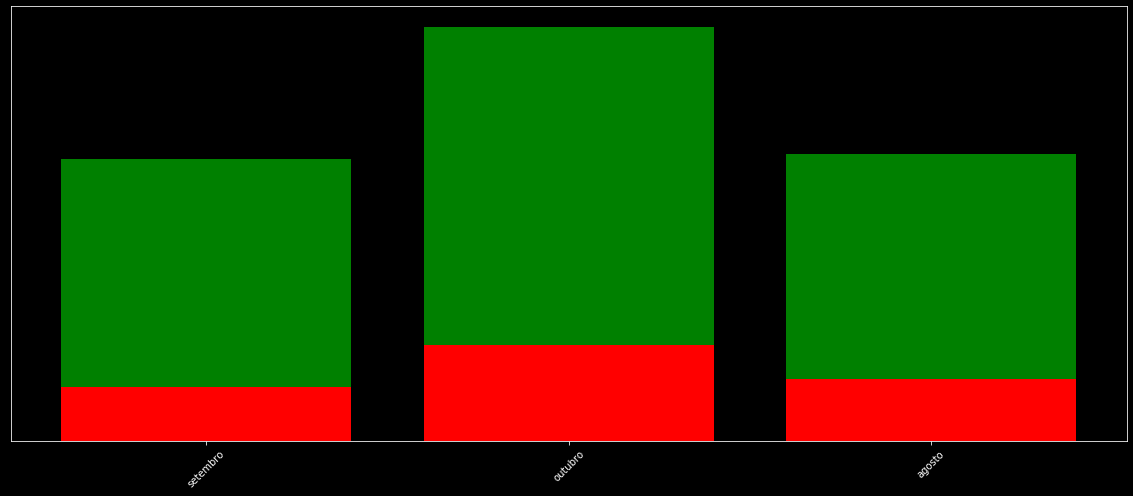

In [36]:
plot_default_freq(df, 'mes_contrato', integer = False)

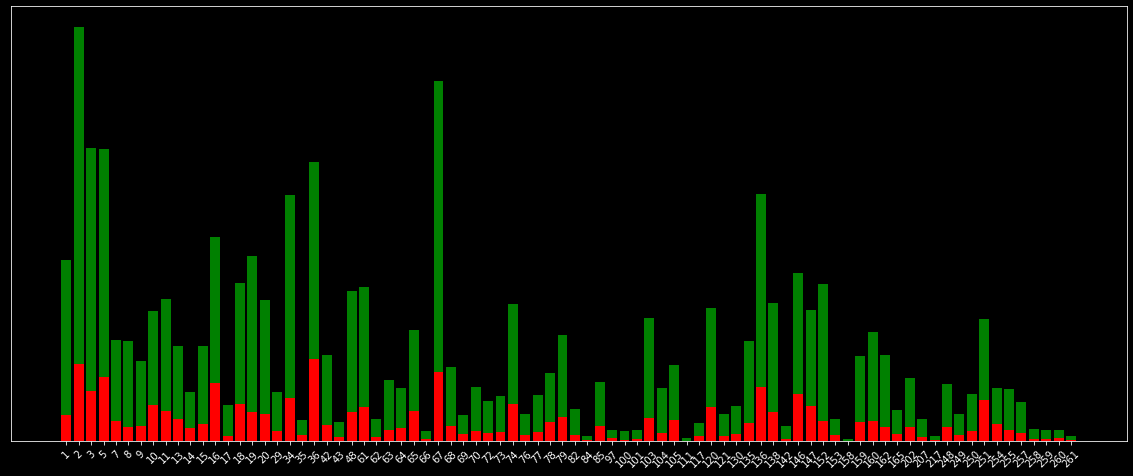

In [37]:
plot_default_freq(df, 'agencia', integer = True)

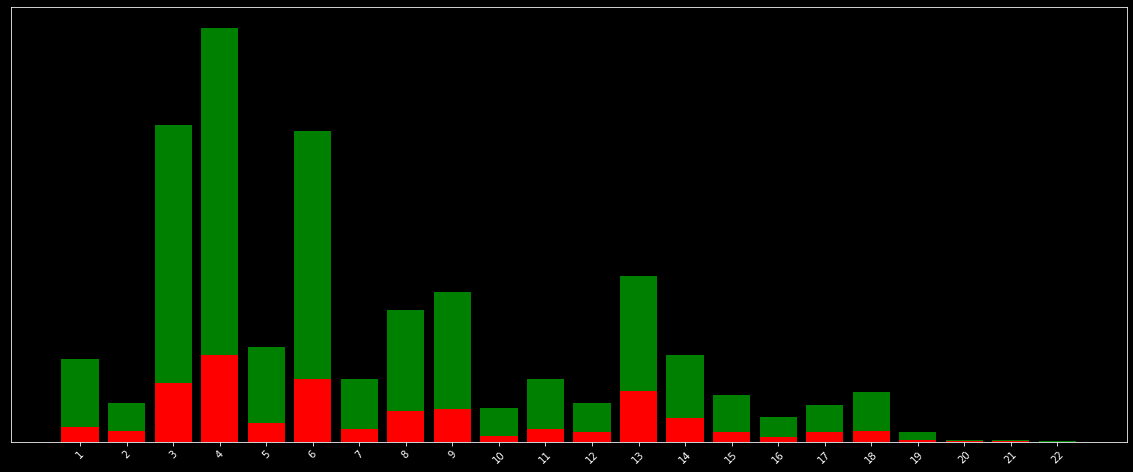

In [38]:
plot_default_freq(df, 'estado', integer = True)

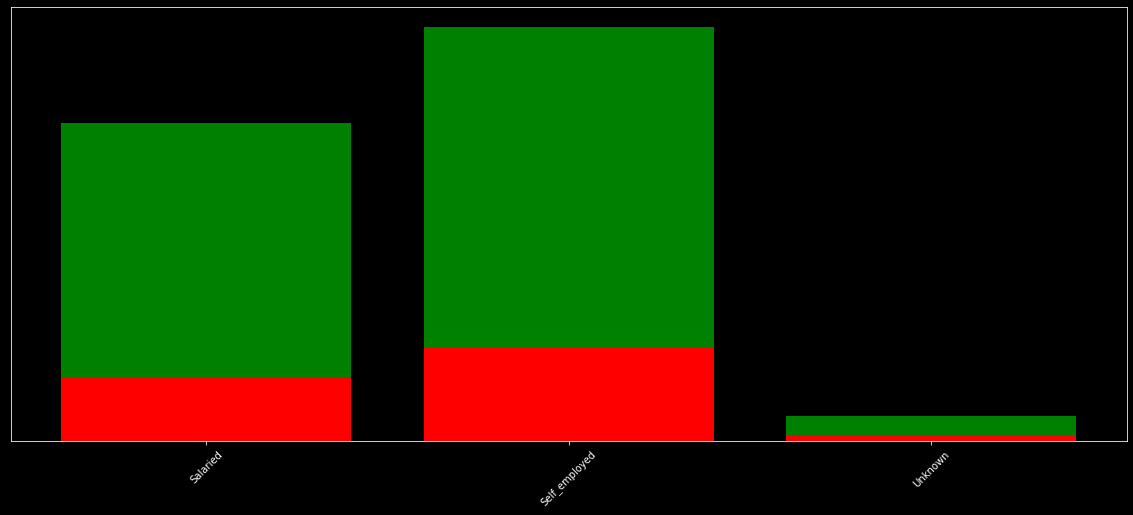

In [39]:
plot_default_freq(df, 'emprego', integer = False)

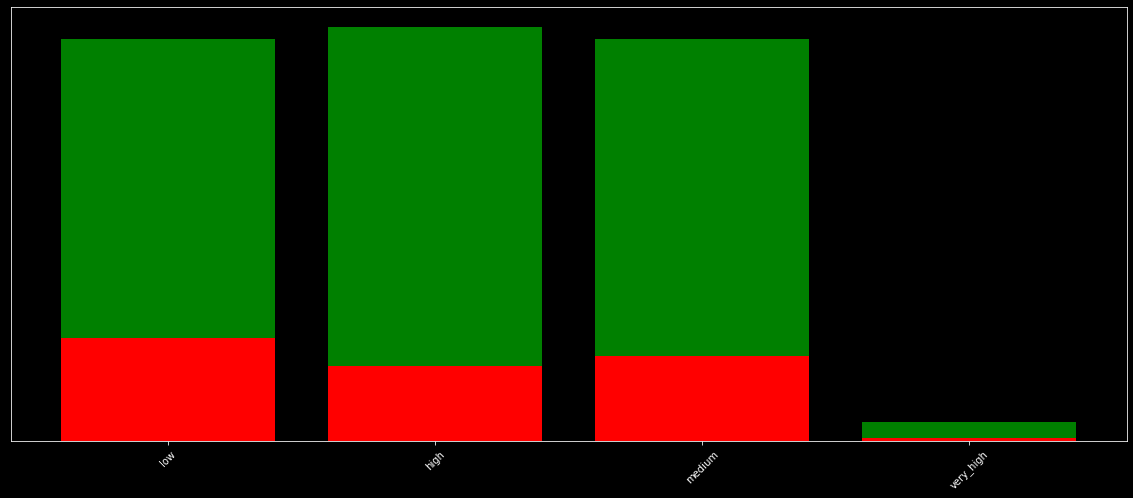

In [40]:
plot_default_freq(df, 'dif_custo_emp', integer = False)

### variáveis explicativas não abordadas até este ponto, porque eu não soube utilizá-las

In [41]:
# 'id_pessoa' e 'Current_pincode_ID' (identificam cada dado)

print(len(df['id_pessoa']))
print(len(df['Current_pincode_ID']))
print(len(df['id_pessoa']) - len(df))

186523
186523
0


In [42]:
# revendedora

len(df['revendedora'].unique())

# suponho que cada valor numérico corresponda a uma revendedora de veículos, onde o cliente para quem crédito 
# foi concedido realizou a compra de seu ativo

# são 2924 possíveis revendedoras, não acredito que se possa ordená-los e depois categorizá-los, como no caso
# de uma variável quantitativa, e segmentá-los entre 2924 grupos não me parece viável, assim como qualquer
# forma de 'clusterização' de dados, de acordo com esta variável

2924

In [43]:
df['revendedora'].value_counts().head(10)

# mesmo que buscássemos pelas revendedoras mais frequentes, na esperança de que estas compuséssem uma
# parcela significativa dos dados, para podermos criar, por exemplo, uma flag, no caso de uma revendedora
# discriminar defaults com eficácia, a ideia não vingaria (len(df) = 186523)

18317    1128
15694    1048
15663    1026
17980    1021
14234    1001
18166     960
14375     914
21980     911
22727     873
14145     847
Name: revendedora, dtype: int64

In [44]:
# montadora

df['montadora'].unique()

# caso semelhante ao de 'revendedora'; julgo que seria mais simples dividir os dados de acordo com esta, 
# mas mesmo que esta feature seja altamente discriminante, em respeito à ocorrência de 'default', não
# consigo imaginar uma justificativa para o fenômeno

array([ 86,  45, 120,  51,  48,  49,  67, 145, 153, 152, 156], dtype=int64)

In [45]:
# funcionario

# na minha opinião, possui os mesmos impedimentos que 'revendedora', mesmo que talvez 'funcionario' tenha o
# potencial de possuir uma correlação mais forte com a ocorrência ou não de default

In [46]:
# 'par_pri_emp'(parcela fixa do primeiro empréstimo) e 
# 'par_seg_emp'(       //        segundo empréstimo)

# df[['par_pri_emp', 'par_seg_emp']]
# não sei o que dizer sobre estsa features

In [47]:
# tem_med_emp(tempo médio de empréstimo)
# tem_pri_emp(tempo desde o primeiro empréstimo)
# qtd_sol_emp(solicitações de empréstimos feitas pelo cliente)

# não tive nenhuma ideia bem definida sobre estas features, mas talvez possam ser úteis

# FLAGS

In [48]:
flag_list = ['flag_telefone', 'flag_aadhar', 'flag_pan', 'flag_eleitor', 'flag_cmotorista', 'flag_passaporte']
for col in flag_list:
    print(col, df[col].unique())
    print(df[col].isnull().sum())
    
# 'flag_telefone' não traz informação nenhuma

flag_telefone [1]
0
flag_aadhar [1 0]
0
flag_pan [0 1]
0
flag_eleitor [0 1]
0
flag_cmotorista [0 1]
0
flag_passaporte [0 1]
0


In [49]:
for flag_type in ['flag_aadhar', 'flag_pan', 'flag_eleitor', 'flag_cmotorista', 'flag_passaporte']:
    print(flag_type)
    print('proporção de default no caso de flag 0:',
          round(df.loc[df[flag_type] == 0, 'default'].value_counts(1).iloc[1], 2))
    print('proporção de default no caso de flag 1:',
          round(df.loc[df[flag_type] == 1, 'default'].value_counts(1).iloc[1], 2))
    print('')

flag_aadhar
proporção de default no caso de flag 0: 0.25
proporção de default no caso de flag 1: 0.21

flag_pan
proporção de default no caso de flag 0: 0.22
proporção de default no caso de flag 1: 0.22

flag_eleitor
proporção de default no caso de flag 0: 0.21
proporção de default no caso de flag 1: 0.26

flag_cmotorista
proporção de default no caso de flag 0: 0.22
proporção de default no caso de flag 1: 0.2

flag_passaporte
proporção de default no caso de flag 0: 0.22
proporção de default no caso de flag 1: 0.14



In [50]:
# pessoas que compartilharam seus passaportes podem ter uma tendência menor a serem maus-pagadores ?
# se sim, como justificar ?